### Contents:

- General data exploration, cleaning, visualizations

- Are Users and Venues related ?

- Can we predict the time estimation more accurately ?

### General data exploration, cleaning, visualizations

In [1]:
## a requirements.txt file will be included
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# First we 'll load the data directly from github:
data = pd.read_csv("https://raw.githubusercontent.com/woltapp/applied-science-internship-2025/refs/heads/main/orders_autumn_2020.csv")
data.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [3]:
# First we turn the TIMESTAMP column into pandas Timestamp type:
data["TIMESTAMP"] = pd.to_datetime(data["TIMESTAMP"])

#### We see that we have missing data.

#### If we look closely the missing data is all about weather data during a specifc day. We will fill in the cloud coverage, temperature and wind speed, with the average obtain by looking at the previous and next day. (So all filled in values will be the same across time.)

In [4]:
cl=[]; temp=[]; wind=[]
month = data.iloc[11778,0].month; day = data.iloc[11778,0].day
for j in range(data.shape[0]):
    if month == data.iloc[j,0].month and (day+1 == data.iloc[j,0].day or day-1 == data.iloc[j,0].day):
        cl.append(data.iloc[j,9])
        temp.append(data.iloc[j,10])
        wind.append(data.iloc[j,11])

for i in range(11778,12055):
    data.iloc[i,9:12] = [np.mean(cl), np.mean(temp), np.mean(wind)]

In [5]:
## TYPE CHECKING:
## We repeat for col = 0, 1, 2, ..., 12.

col = 11

s = set()
for i in range(data.shape[0]):
    s.add( type(data.iloc[i,col]) )
print(s)

{<class 'numpy.float64'>}


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   TIMESTAMP                                             18706 non-null  datetime64[ns]
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64         
 2   ITEM_COUNT                                            18706 non-null  int64         
 3   USER_LAT                                              18706 non-null  float64       
 4   USER_LONG                                             18706 non-null  float64       
 5   VENUE_LAT                                             18706 non-null  float64       
 6   VENUE_LONG                                            18706 non-null  float64       
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64 

In [17]:
data.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


#### After the neccessary type-checking, everything is OK.

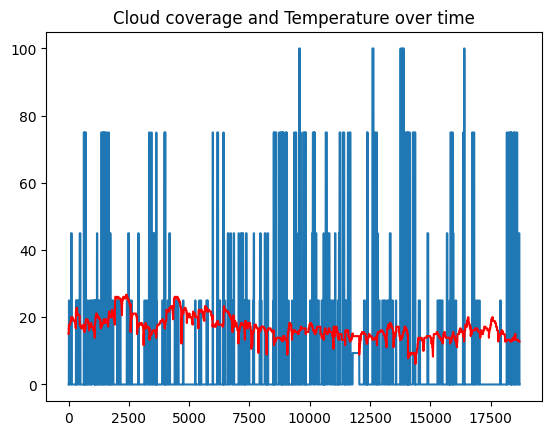

In [49]:
## A small wethear visualization out of curiosity :
plt.plot(list(data.iloc[:,9]))
plt.plot(list(data.iloc[:, 10]), color="red")
plt.title("Cloud coverage and Temperature over time")
# plt.savefig("./weather.png")
plt.show()

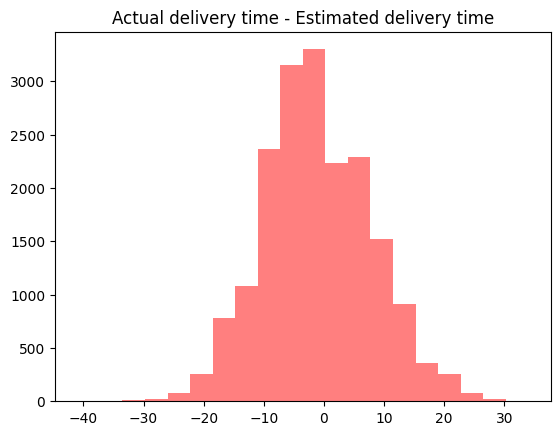

The average discrepancy is 8.98 minutes!


In [51]:
## And similarly a histogram of the time discrepancies (actual-estimation):
plt.hist(list(data.iloc[:, 1]), color="red", bins=20, alpha=0.5)
plt.title("Actual delivery time - Estimated delivery time")
# plt.savefig("./discrpancy.png")
plt.show()

## we return the square root of the varance (ie the standard deviation)
print(f"The average discrepancy is {round(np.sqrt(np.var(data.iloc[:, 1])), 2)} minutes!")

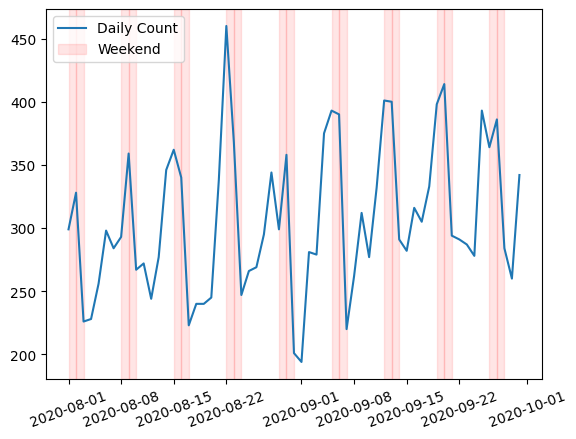

In [61]:
## Let's verify our intuition that the data should have some periodicity in them:
daily_counts = data.groupby(data["TIMESTAMP"].dt.date).size()
plt.plot(daily_counts)
plt.xticks(rotation=20)
for date in daily_counts.index:
    if date.weekday() in [5, 6]:  # 5 = Saturday, 6 = Sunday
        # plt.axvline(date, color="red", alpha=0.2)
        plt.axvspan(date, date + pd.Timedelta(days=1), color="red", alpha=0.1)
# for date in daily_counts.index:
#     if date.weekday() in [0,1,2,3,4]:
#         plt.axvline(date, color="black", alpha=0.05)

plt.legend(["Daily Count", "Weekend"], loc="upper left")

start_date = "2020-08-07"
end_date = "2020-08-11"
# plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.savefig("./weekends.png")
plt.show()

### As we see in the plot above the orders are having a peak exactly on the weekends. We expect similar periodicity among hours months and years as well. (In the models we will make use of all of those types of periodicity.)

### Let's now visualize the locations of the users and the venues ! We will also use a map to see where the data comes from !

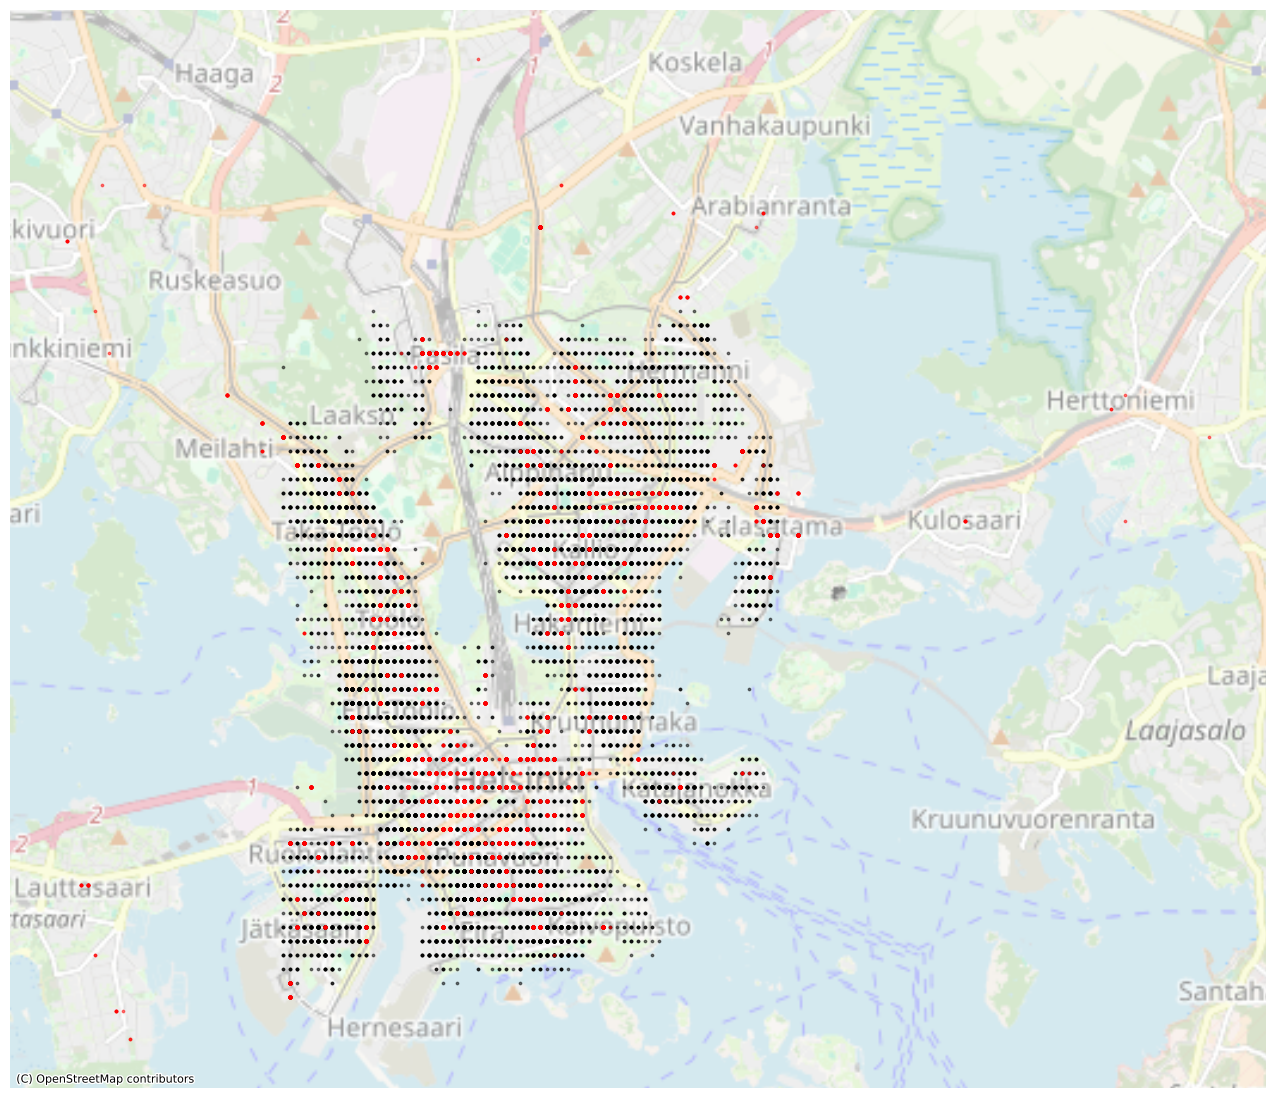

In [58]:
import geopandas as gpd
import contextily as ctx

#users
coor1 = {
    'longitude': list(data.iloc[:,4]),
    'latitude': list(data.iloc[:,3])
}
gdf1 = gpd.GeoDataFrame(coor1, geometry=gpd.points_from_xy(coor1['longitude'], coor1['latitude']), crs="EPSG:4326")
gdf1 = gdf1.to_crs(epsg=3857)

#venues
coor2 = {
    'longitude': list(data.iloc[:,6]),
    'latitude': list(data.iloc[:,5])
}
gdf2 = gpd.GeoDataFrame(coor2, geometry=gpd.points_from_xy(coor2['longitude'], coor2['latitude']), crs="EPSG:4326")
gdf2 = gdf2.to_crs(epsg=3857)



fig, ax = plt.subplots(figsize=(20, 14))
gdf1.plot(ax=ax, color='black', markersize=3, label="User Location", alpha=0.5)
gdf2.plot(ax=ax, color='red', markersize=3, label="Venue Location", alpha=0.5)

# ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])

# plt.legend()
# plt.title("Helsinki Delivery Locations on Map")
plt.axis('off')
fig.savefig('helsinki.png', bbox_inches='tight', pad_inches=0)
# plt.savefig("./helsinki.png")
plt.show()


In [28]:
## We will also create an extra column that holds the disctances between user and venue in kilometers!
## Based on the web you can convert geo-spatial coordinate distances into kilometer distances by just multiplying with 111,
## , because 1 degree on the map is approximately 111 kilometers.

data["DISTANCE"] = np.sqrt((data["USER_LAT"] - data["VENUE_LAT"])**2 + (data["USER_LONG"] - data["VENUE_LONG"])**2) * 111

# Are users and Venues related ?

### Let's first implement the following process and then we can interpete it.

### What we will do is this: For every order (ie. row in the dataset) we keep only the 4 coordinates (longitude,latitude for the user and for the venue). Then we imagine all those points plotted in a 4D space! This point cloud contains information not only for the locations of users and venues individualy, but also for the way those are connected! So if we do a clustering analysis we will probably (and hopefully) find tho most prominent of those connections.

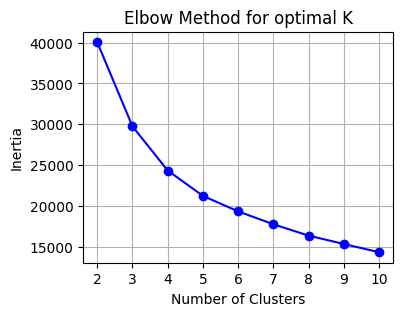

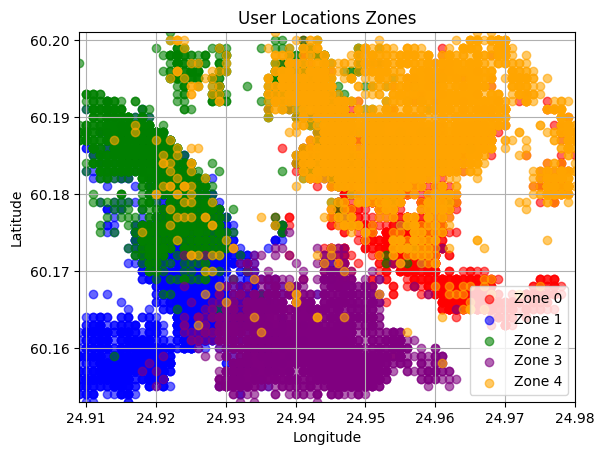

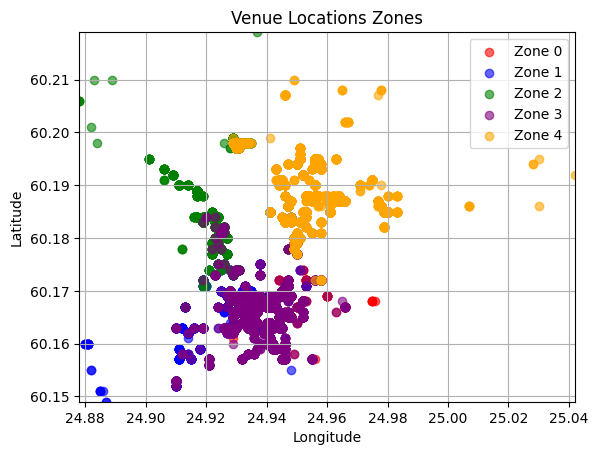

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

lat_long_features = ["USER_LAT", "USER_LONG", "VENUE_LAT", "VENUE_LONG"]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[lat_long_features])

inertia = []
K_range = range(2, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(4, 3))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['DELIVERY_ZONE'] = kmeans.fit_predict(data_scaled)  # Assign cluster labels to the DELIVERY_ZONE column

cluster_centers = kmeans.cluster_centers_

user_lat_min, user_lat_max = data['USER_LAT'].min(), data['USER_LAT'].max()
user_long_min, user_long_max = data['USER_LONG'].min(), data['USER_LONG'].max()

venue_lat_min, venue_lat_max = data['VENUE_LAT'].min(), data['VENUE_LAT'].max()
venue_long_min, venue_long_max = data['VENUE_LONG'].min(), data['VENUE_LONG'].max()

# Plot 1:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(optimal_k):
    cluster_data = data[data["DELIVERY_ZONE"] == cluster]
    plt.scatter(cluster_data["USER_LONG"], cluster_data["USER_LAT"], c=colors[cluster], label=f'Zone {cluster}', alpha=0.6)


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("User Locations Zones")
plt.xlim(user_long_min, user_long_max)
plt.ylim(user_lat_min, user_lat_max)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("./zones_users.png")
plt.show()


# Plot 2:
for cluster in range(optimal_k):
    cluster_data = data[data["DELIVERY_ZONE"] == cluster]
    plt.scatter(cluster_data["VENUE_LONG"], cluster_data["VENUE_LAT"], c=colors[cluster], label=f'Zone {cluster}', alpha=0.6)


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Venue Locations Zones")
plt.xlim(venue_long_min, venue_long_max)
plt.ylim(venue_lat_min, venue_lat_max)
plt.legend(loc='lower right')
plt.grid(True)

plt.legend()
plt.savefig("./zones_venues")
plt.show()

### As we see in the plot above when plotting the locations for users and then for venues and coloring them based on their corresponding cluster ... the final coloring matches! This indicates that users are selecting based on distance (at least in the large-scale).

### We can also compute which cluster, or we can call the DELIVERY ZONES, seems to be more compact (ie. not very spread in relation to others):

In [7]:
## we will compute the clustery quality of the DELIVERY ZONES with slhouette score:

from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(data_scaled, data['DELIVERY_ZONE'])

cluster_silhouette_scores = []


for cluster in range(optimal_k):
    
    cluster_silhouette_vals = silhouette_vals[data['DELIVERY_ZONE'] == cluster]
    
    
    avg_score = np.mean(cluster_silhouette_vals)
    cluster_silhouette_scores.append(avg_score)

for cluster, score in enumerate(cluster_silhouette_scores):
    print(f"Average Silhouette Score for Cluster {cluster}: {score:.4f}")

Average Silhouette Score for Cluster 0: 0.2210
Average Silhouette Score for Cluster 1: 0.2199
Average Silhouette Score for Cluster 2: 0.2986
Average Silhouette Score for Cluster 3: 0.4008
Average Silhouette Score for Cluster 4: 0.3683


In [22]:
from sklearn.metrics import pairwise_distances

X = data[["USER_LONG", "USER_LAT", "VENUE_LONG", "VENUE_LAT"]].values

# Compute mean pairwise distances overall (city = 1 cluster):
distances = pairwise_distances(X)
mpd1 = np.mean(distances)
print(f"Mean Pairwise Distance (1 Cluster - Baseline): {mpd1}")

# Compute mean pairwise distance within each cluster
mean_distances_per_cluster = []
for zone in [0,1,2,3,4]: # Delivery zones: 0, ..., 4
    cluster_points = X[data["DELIVERY_ZONE"] == zone]
    intra_distances = pairwise_distances(cluster_points)
    mean_distances_per_cluster.append(np.mean(intra_distances))

mpd2 = np.mean(mean_distances_per_cluster)
print(f"Mean Pairwise Distance (4 Clusters): {mpd2}")

Mean Pairwise Distance (1 Cluster - Baseline): 0.03597654677968928
Mean Pairwise Distance (4 Clusters): 0.019362862449121627


In [23]:
print(f"Compactness increased by {round((mpd1-mpd2)/mpd1, 2)}%.")

Compactness increased by 0.46%.


### DELIVERY ZONES 3 and 4 (ie. purple and yellow) seem to be the most compact!

### Let's also compute the average distance inside of the DELIVERY ZONES:

Zone 0 average distance: 2.02 km
Zone 1 average distance: 1.58 km
Zone 2 average distance: 1.53 km
Zone 3 average distance: 1.21 km
Zone 4 average distance: 1.43 km


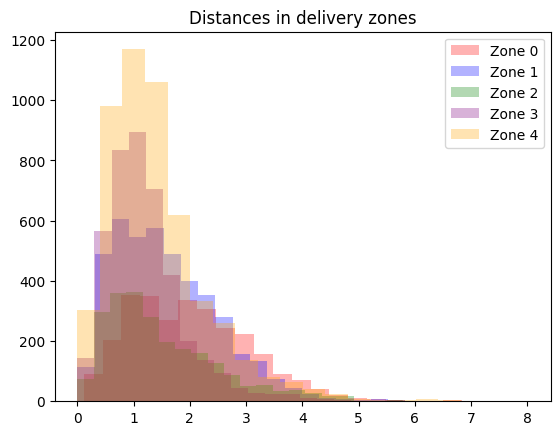

In [35]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(optimal_k):
    l=[]
    for i in range(data.shape[0]):
        if data.iloc[i,14] == cluster:
            l.append(data.iloc[i,13])
    plt.hist(l, bins=20, color=colors[cluster], alpha=0.3, label=f'Zone {cluster}')
    print(f"Zone {cluster} average distance: {round(np.mean(l),2)} km")
plt.legend()
plt.title("Distances in delivery zones")
plt.show()

### The distances follow the clustering quality (although they are different notions).

# Can we improve the time estimation of the delivery ?

### We suppose that Wolt lready has an algorithm that estimates the time needed (so that to produce the ESTIMATED_DELIVERY_MINUTES column). We will use this resource and add everything else, wethtear info, delivery zone, distance !

### We will repeat the preprocessing each time inside the Cross-Validation stage.

### However we have to be carefull with our clustering analysis. If we use the new column as it is, we would induce data leakage to our analysis! Therefore we will first split into train and test and then conclude with the delivery zone analyis (test points will be classified to the closes centroid). And all this will be repeated in each fold in our 5-fold Cross Validation.

In [25]:
## Also we will convert the datetime column into separate categorical columns (as discuss previously).
#Let's redo the whole preprocessing once again for clarity.

data = pd.read_csv("https://raw.githubusercontent.com/woltapp/applied-science-internship-2025/refs/heads/main/orders_autumn_2020.csv")
data["TIMESTAMP"] = pd.to_datetime(data["TIMESTAMP"])

cl=[]; temp=[]; wind=[]
month = data.iloc[11778,0].month; day = data.iloc[11778,0].day
for j in range(data.shape[0]):
    if month == data.iloc[j,0].month and (day+1 == data.iloc[j,0].day or day-1 == data.iloc[j,0].day):
        cl.append(data.iloc[j,9])
        temp.append(data.iloc[j,10])
        wind.append(data.iloc[j,11])

for i in range(11778,12055):
    data.iloc[i,9:12] = [np.mean(cl), np.mean(temp), np.mean(wind)]

data["DISTANCE"] = np.sqrt((data["USER_LAT"] - data["VENUE_LAT"])**2 + (data["USER_LONG"] - data["VENUE_LONG"])**2)*111 #(1degree=111km)


data['MONTH'] = data['TIMESTAMP'].dt.month
data['DAY'] = data['TIMESTAMP'].dt.day
data['HOUR'] = data['TIMESTAMP'].dt.hour
data['MINUTE'] = data['TIMESTAMP'].dt.minute
data['WEEKDAY'] = data['TIMESTAMP'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['WEEKEND'] = data['WEEKDAY'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if weekday

data.drop(columns=['TIMESTAMP'], inplace=True)

In [32]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



kf = KFold(n_splits=5, shuffle=True, random_state=13)
lr_mae_test = []; rf_mae_test = []; gb_mae_test = []; bag_mae_test =[]; xgb_mae_test =[]; gt_mae_test=[]

k=0
for train_index, test_index in kf.split(X=data):
    print(f"\nFold: {k}")
    train = data.iloc[train_index, :].copy()
    test = data.iloc[test_index, :].copy()

    at_long_features = ["USER_LAT", "USER_LONG", "VENUE_LAT", "VENUE_LONG"]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[lat_long_features])
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    train['DELIVERY_ZONE'] = kmeans.fit_predict(train_scaled)
    
    test_scaled = scaler.transform(test[lat_long_features])
    test['DELIVERY_ZONE'] = kmeans.predict(test_scaled)


### We can try out different combinations of features:

    features = [
           'ESTIMATED_DELIVERY_MINUTES', 'ITEM_COUNT',
           'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION',
           'DISTANCE', 'DELIVERY_ZONE', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
           'WEEKDAY', 'WEEKEND', 'ACTUAL_DELIVERY_MINUTES'
            ]

    # features = [
    #        'ESTIMATED_DELIVERY_MINUTES', 'ITEM_COUNT',
    #        'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION',
    #        'DISTANCE', 'DELIVERY_ZONE',
    #        'WEEKEND', 'ACTUAL_DELIVERY_MINUTES'
    #         ]

    # features = [
    #        'ESTIMATED_DELIVERY_MINUTES', 'ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG',
    #        'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION',
    #        'DISTANCE', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
    #        'WEEKDAY', 'WEEKEND', 'ACTUAL_DELIVERY_MINUTES'
    #         ]
    
    train = train[features]; test = test[features]

    
    x_train = train.iloc[:, :-1]; y_train = train.iloc[:, -1]
    x_test = test.iloc[:, :-1]; y_test = test.iloc[:, -1]

    print(f"------ Ground Truth MAE: {mean_absolute_error(y_test, x_test.iloc[:,0])}")
    gt_mae_test.append(mean_absolute_error(y_test, x_test.iloc[:,0]))
    
    # Standardize the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train)
    
    x_test = scaler.transform(x_test)
    x_test = pd.DataFrame(x_test)
    
    ########### Linear Regression
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print("\nLinear Regression:")
    
    # Train performance
    y_train_pred = lr.predict(x_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f"TRAIN: MAE: {mae_train}")
    
    # Test performance
    y_test_pred = lr.predict(x_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"TEST: MAE: {mae_test}")
    
    lr_mae_test.append(mae_test)
    
    #################### Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=13)
    rf.fit(x_train, y_train)
    print("\nRandom Forest Regressor:")
    
    # Train performance
    y_train_pred = rf.predict(x_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f"TRAIN: MAE: {mae_train}")
    
    # Test performance
    y_test_pred = rf.predict(x_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"TEST: MAE: {mae_test}")
    
    rf_mae_test.append(mae_test)
    
    #################### Gradient Boosting Regressor
    gb = GradientBoostingRegressor(random_state=13)
    gb.fit(x_train, y_train)
    print("\nGradient Boosting Regressor:")
    
    # Train performance
    y_train_pred = gb.predict(x_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f"TRAIN: MAE: {mae_train}")
    
    # Test performance
    y_test_pred = gb.predict(x_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"TEST: MAE: {mae_test}")
    
    gb_mae_test.append(mae_test)
    
    #################### Bagging Regressor
    bag = BaggingRegressor(n_estimators=10, random_state=13)
    bag.fit(x_train, y_train)
    print("\nBagging Regressor:")
    
    # Train performance
    y_train_pred = bag.predict(x_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f"TRAIN: MAE: {mae_train}")
    
    # Test performance
    y_test_pred = bag.predict(x_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"TEST: MAE: {mae_test}")
    
    bag_mae_test.append(mae_test)


    ################### XGBoost
    xg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)
    xg.fit(x_train, y_train)
    print("\nXGBoost Regressor:")
    
    # Train performance
    y_train_pred = xg.predict(x_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f"TRAIN: MAE: {mae_train}")
    
    # Test performance
    y_test_pred = xg.predict(x_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"TEST: MAE: {mae_test}")
    
    xgb_mae_test.append(mae_test)
    
    ## fold counter:
    k += 1

    
    
# Final averages of metrics
print("\n\nFinal Averages of Metrics:\n")

print(f"Test Linear Regression MAE: {np.mean(lr_mae_test)}")
print(f"Test Random Forrests MAE: {np.mean(rf_mae_test)}")
print(f"Test Gradient Boosting MAE: {np.mean(gb_mae_test)}")
print(f"Test Bagging MAE: {np.mean(bag_mae_test)}")
print(f"Test XGBoost MAE: {np.mean(xgb_mae_test)}")
print(f"\nTest Ground Truth Estimation: {np.mean(gt_mae_test)}")



Fold: 0
------ Ground Truth MAE: 7.101817210048103

Linear Regression:
TRAIN: MAE: 6.939454994204988
TEST: MAE: 6.802636096350983

Random Forest Regressor:
TRAIN: MAE: 2.5452278802459234
TEST: MAE: 6.746619454836985

Gradient Boosting Regressor:
TRAIN: MAE: 6.602942755365554
TEST: MAE: 6.559177642617088

Bagging Regressor:
TRAIN: MAE: 2.811688051323176
TEST: MAE: 7.028246926777125

XGBoost Regressor:
TRAIN: MAE: 6.611868381500244
TEST: MAE: 6.562427043914795

Fold: 1
------ Ground Truth MAE: 7.356054530874098

Linear Regression:
TRAIN: MAE: 6.891220358535918
TEST: MAE: 6.9952820063649845

Random Forest Regressor:
TRAIN: MAE: 2.5357320414300037
TEST: MAE: 6.906867147821438

Gradient Boosting Regressor:
TRAIN: MAE: 6.549604968425838
TEST: MAE: 6.804297725642128

Bagging Regressor:
TRAIN: MAE: 2.7894086201135986
TEST: MAE: 7.14501470195135

XGBoost Regressor:
TRAIN: MAE: 6.5564141273498535
TEST: MAE: 6.799818992614746

Fold: 2
------ Ground Truth MAE: 7.235765838011227

Linear Regression

In [34]:
print(f"The percentage of improvement was {round( ( np.mean(gt_mae_test) - np.mean(xgb_mae_test) ) * 100 / np.mean(gt_mae_test), 2)} % " )

The percentage of improvement was 7.6 % 


### It seems that we can improve the delivery time estimation (which of course has an effect on the user satisfaction) by 7.6% !
